<a href="https://colab.research.google.com/github/LemonRabb1t/Pytorch/blob/main/simple_neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# create model class that inherist nn.Module

class Model(nn.Module):
  # input: 4 features of flower
  # hidden layer1: # of neurons
  # h2(n)
  # output: 3 classes of iris flowers

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate nn.Module, mandatory
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  # function to move between layers
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [ ]:
# pick a manual seed for random

torch.manual_seed(42)

# create an instance of model
model = Model()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [ ]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# change last column from string to int
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

<ipython-input-7-476cb1efa47a>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
# train test split. set x and y
X = my_df.drop('species', axis=1) # X = feature
y = my_df['species'] # y = outcome

# convert data frame to numpy arrays
X= X.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split #sklearn from pandas
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41) # test size is 20%

In [ ]:
# convert x to float tensors
X_train = torch.FloatTensor(X_train) # converting vlaues to floats
X_test = torch.FloatTensor(X_test)

# convert y to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test) # Long Tensors are 64 bit ints

In [ ]:
# set criteria of model to measure the error
criterion = nn.CrossEntropyLoss()
# using the adam optimizer, set learning rate (if error doesn't decrease after many iterations (epochs), lower rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # lower learning rate = longer to train | model.parameters() pass the fc1, fc2, out


In [ ]:
# check parameters
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [ ]:
# train the model
# determine # of epochs (1 run thru all data in network)
epochs = 200
losses = []
for i in range(epochs):
  # go forward and get a prediction
  y_pred = model.forward(X_train) # send x data parameters to predict the flower

  # measure the loss/error, will be high to start
  loss = criterion(y_pred, y_train) # actual / predicted

  # track losses
  losses.append(loss.detach().numpy()) #append as numpy

  # print every 10 epoch
  if i % 10 ==0:
    print(f'Epoch: {i} and loss: {loss}')

  # back propagation: take error rate of forward propagation and feed it back thru the network
  # to tune the weights

  optimizer.zero_grad() # clear old gradient values, ensures gradients from prev iterations don't accumulate
  loss.backward() # performs backpropagation to calculate new gradients of the loss with respect to each parameter (weights)
  optimizer.step() # uses calculated gradients to update model parameters, moves gradients towards values that min loss

Epoch: 0 and loss: 1.0935204029083252
Epoch: 10 and loss: 0.9156657457351685
Epoch: 20 and loss: 0.7562994360923767
Epoch: 30 and loss: 0.6108629107475281
Epoch: 40 and loss: 0.44145309925079346
Epoch: 50 and loss: 0.2723323404788971
Epoch: 60 and loss: 0.16078141331672668
Epoch: 70 and loss: 0.09846457839012146
Epoch: 80 and loss: 0.06856968253850937
Epoch: 90 and loss: 0.05372077599167824
Epoch: 100 and loss: 0.04533413425087929
Epoch: 110 and loss: 0.039961688220500946
Epoch: 120 and loss: 0.036167994141578674
Epoch: 130 and loss: 0.033294059336185455
Epoch: 140 and loss: 0.031004110351204872
Epoch: 150 and loss: 0.029112061485648155
Epoch: 160 and loss: 0.027506960555911064
Epoch: 170 and loss: 0.026118915528059006
Epoch: 180 and loss: 0.024898499250411987
Epoch: 190 and loss: 0.02381317876279354


Text(0.5, 0, 'epoch')

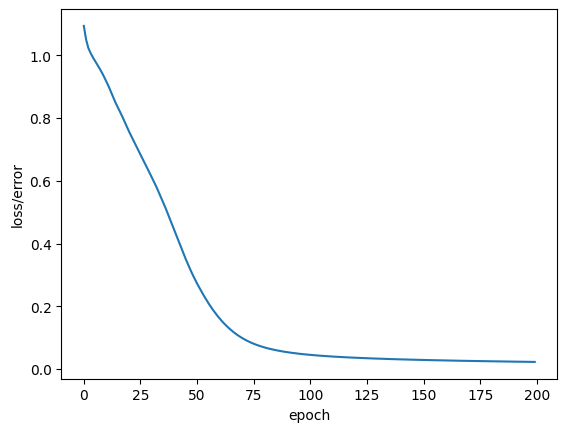

In [ ]:
# graph
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")

In [ ]:
# evaluate the model
with torch.no_grad(): #turn off back propogation
  y_eval = model.forward(X_test) # X-test are features from test set, y_eval
  loss = criterion (y_eval, y_test )# find loss or error

loss

tensor(0.1538)

In [ ]:
correct = 0

with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model(data)

        # what type of flower class network thinks it is
        print(f'{i+1}.) {str(y_val)} \t {y_test[i]}')

        # check correctness
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'we got {correct}  correct!')

1.) tensor([-6.0507,  4.5046,  8.6023]) 	 2
2.) tensor([-9.9285,  1.7198, 13.2639]) 	 2
3.) tensor([-10.1337,   3.2280,  13.6510]) 	 2
4.) tensor([-0.7389,  9.3352,  2.3532]) 	 1
5.) tensor([-7.9129,  3.9459, 10.9254]) 	 2
6.) tensor([1.1504, 9.0061, 0.3277]) 	 1
7.) tensor([-5.1266,  5.5876,  7.5586]) 	 2
8.) tensor([-0.4183,  9.4563,  1.9793]) 	 1
9.) tensor([-6.4676,  4.7697,  9.1814]) 	 2
10.) tensor([-10.5145,   1.8185,  14.0173]) 	 2
11.) tensor([-4.6477,  5.8581,  6.9836]) 	 2
12.) tensor([ 11.2469,   4.2895, -10.1183]) 	 0
13.) tensor([10.1061,  3.7802, -9.0481]) 	 0
14.) tensor([ 1.9319,  7.2750, -0.6251]) 	 1
15.) tensor([ 9.9442,  4.6030, -8.8017]) 	 0
16.) tensor([-4.0357,  6.8220,  6.2726]) 	 2
17.) tensor([10.4889,  4.0870, -9.3928]) 	 0
18.) tensor([-5.6119,  5.0210,  8.1042]) 	 1
19.) tensor([10.8754,  4.1237, -9.7698]) 	 0
20.) tensor([ 9.2884,  3.7998, -8.2403]) 	 0
21.) tensor([ 1.5620,  8.0901, -0.1746]) 	 1
22.) tensor([-9.2799,  2.9143, 12.5640]) 	 2
23.) tensor([

In [ ]:
# new flower to guess
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [ ]:
with torch.no_grad():
  print(model(new_iris))

tensor([10.6348,  4.0162, -9.5441])


In [ ]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [ ]:
with torch.no_grad():
  y_val = model(newer_iris)

  print(f'{y_val.argmax().item()}')

2


In [ ]:
# save nn model
torch.save(model.state_dict(), 'iris example model.pt')

In [ ]:
# load saved model
new_model = Model()
new_model.load_state_dict(torch.load('iris example model.pt'))


<ipython-input-33-733655a426b4>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('iris example model.pt'))


<All keys matched successfully>

In [ ]:
# check
new_model.eval()


Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [ ]:
new_model(newer_iris)

tensor([-6.1055,  4.4524,  8.6910], grad_fn=<ViewBackward0>)